Full example available [here](https://subscription.packtpub.com/book/data/9781800208865/2/ch02lvl1sec15/implementing-backpropagation)

In [1]:
import numpy as np 
import tensorflow as tf #Work wit Tensor Flow 2
import matplotlib.pyplot as plt

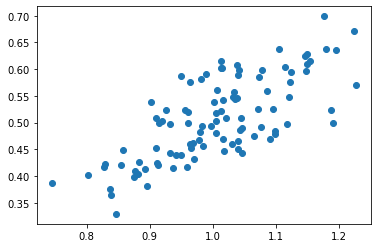

In [2]:
np.random.seed(0)#Set random seeds
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32) #Create syntetic data
y_vals = (x_vals * (np.random.normal(1, 0.05, 100) - 0.5)).astype(np.float32)
plt.scatter(x_vals, y_vals)#Plot the data
plt.show()

In [3]:
#Create a function to perform the weighted sum of values and biases.
def my_output(X, weights, biases):
    return tf.add(tf.multiply(X, weights), biases)

In [4]:
#Calculate loss
def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [5]:
#Use a learning algorithm Stochastic Gradient Descent
my_opt = tf.optimizers.legacy.SGD(learning_rate=0.02)

In [6]:
#Initialize weights and variables with random values
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1])) 
biases = tf.Variable(tf.random.normal(shape=[1])) 
history = list()


In [17]:
#Train the model with all the data, write to output the each 25 points.
for i in range(100): 
    rand_index = np.random.choice(100) 
    rand_x = [x_vals[rand_index]] 
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)        
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0: 
        print(f'Step # {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')         

Step # 25 Weights: [1.4957254] Biases: [0.1448258]
Loss = 0.011109568178653717
C = [170.26578]
Step # 50 Weights: [1.5243487] Biases: [0.1352461]
Loss = 0.0012877383269369602
C = [265.16476]
Step # 75 Weights: [1.5525385] Biases: [0.12658621]
Loss = 0.04998167231678963
C = [374.1044]
Step # 100 Weights: [1.5855882] Biases: [0.11392551]
Loss = 0.14755862951278687
C = [466.44]


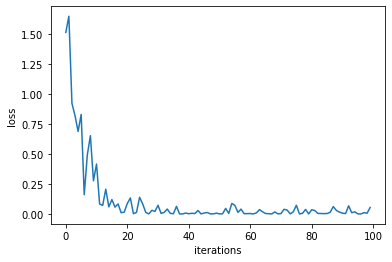

In [8]:
#Plot the loss
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

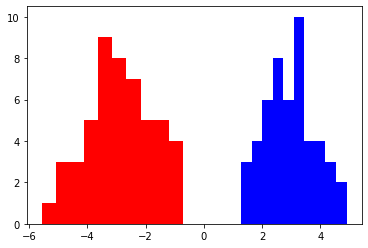

In [9]:
#Create 100 test values 
np.random.seed(0)
x_vals = np.concatenate((np.random.normal(-3, 1, 50), 
                         np.random.normal(3, 1, 50))
                    ).astype(np.float32) 
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50))).astype(np.float32) 
plt.hist(x_vals[y_vals==1], color='b')
plt.hist(x_vals[y_vals==0], color='r')
plt.show()

In [10]:
#New loss function
def loss_func(y_true, y_pred):
    return tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [11]:
#Initialize random values
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1])) 
biases = tf.Variable(tf.random.normal(shape=[1])) 
history = list()

In [14]:
#Main loop for testing values
errors=0
for i in range(100):    
    rand_index = np.random.choice(100) 
    rand_x = [x_vals[rand_index]] 
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)        
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0: 
        print(f'Step {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')        

Step 25 Weights: [0.9467814] Biases: [0.2743145]
Loss = 0.03775952383875847
Errors = [9.349814]
Step 50 Weights: [1.0293905] Biases: [0.2582258]
Loss = 0.023502428084611893
Errors = [9.745389]
Step 75 Weights: [1.0953044] Biases: [0.23995903]
Loss = 0.1629609316587448
Errors = [23.756622]
Step 100 Weights: [1.1610403] Biases: [0.2251443]
Loss = 0.002713616704568267
Errors = [11.535692]


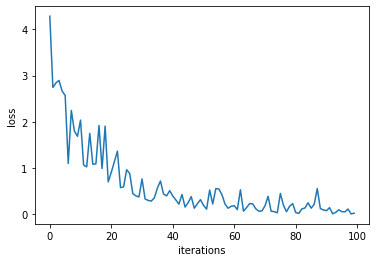

In [13]:
#Plot loss
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()